In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# run_y24-m04-d29_h13-m41_hYKbn <- 200 points per traj
# run_y24-m04-d29_h13-m43_yijsu <- 400 points per traj
# run_y24-m04-d29_h13-m46_ThEgL <- 500 points per traj
# run_y24-m04-d29_h13-m49_NsGdg <- 500 ppt, 0.5 vel
csv_file = "run_y24-m05-d02_h18-m13_TIWLE"
csv_file += ".csv"
path = os.path.join(os.getcwd(), "data", csv_file)

df = pd.read_csv(path)
df.columns

Index(['index', 'run_name', 'x', 'y', 'z', 'roll', 'pitch', 'yaw', 'gate_x',
       'gate_y', 'gate_z', 'gate_yaw', 'vx_global', 'vy_global', 'vz_global',
       'vx_local', 'vy_local', 'roll_rate', 'pitch_rate', 'yaw_rate', 'x_sp',
       'y_sp', 'z_sp', 'vx_local_sp', 'vy_local_sp', 'alt_sp', 'yaw_rate_sp',
       'alt_command', 'roll_command', 'pitch_command', 'yaw_command',
       'camera_img', 'depth_img', 'pencil_img'],
      dtype='object')

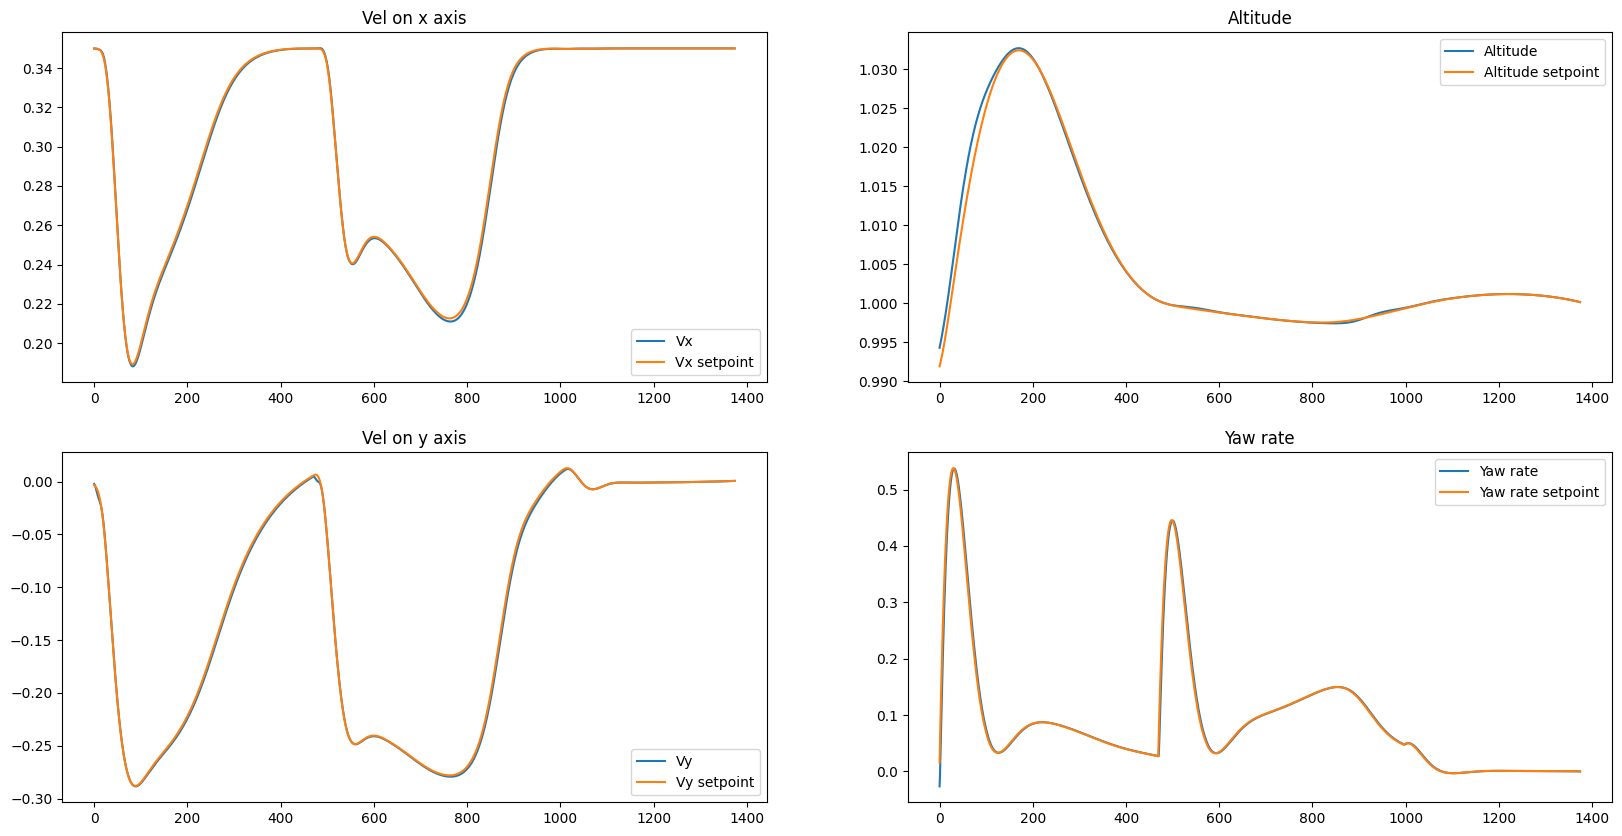

In [3]:
# %matplotlib notebook

plt.rcParams['figure.figsize'] = 20,10
fig, axs = plt.subplots(2, 2)


axs[0,0].plot(df['vx_local'], label='Vx')
axs[0,0].plot(df['vx_local_sp'], label='Vx setpoint')
axs[0,0].set_title("Vel on x axis")
axs[0,0].legend()

axs[1,0].plot(df['vy_local'], label='Vy')
axs[1,0].plot(df['vy_local_sp'], label='Vy setpoint')
axs[1,0].set_title("Vel on y axis")
axs[1,0].legend()


axs[0,1].plot(df['z'], label='Altitude')
axs[0,1].plot(df['alt_sp'], label='Altitude setpoint')
axs[0,1].set_title("Altitude")
axs[0,1].legend()

axs[1,1].plot(df["yaw_rate"], label='Yaw rate')
axs[1,1].plot(df["yaw_rate_sp"], label='Yaw rate setpoint')
axs[1,1].set_title("Yaw rate")
axs[1,1].legend()

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


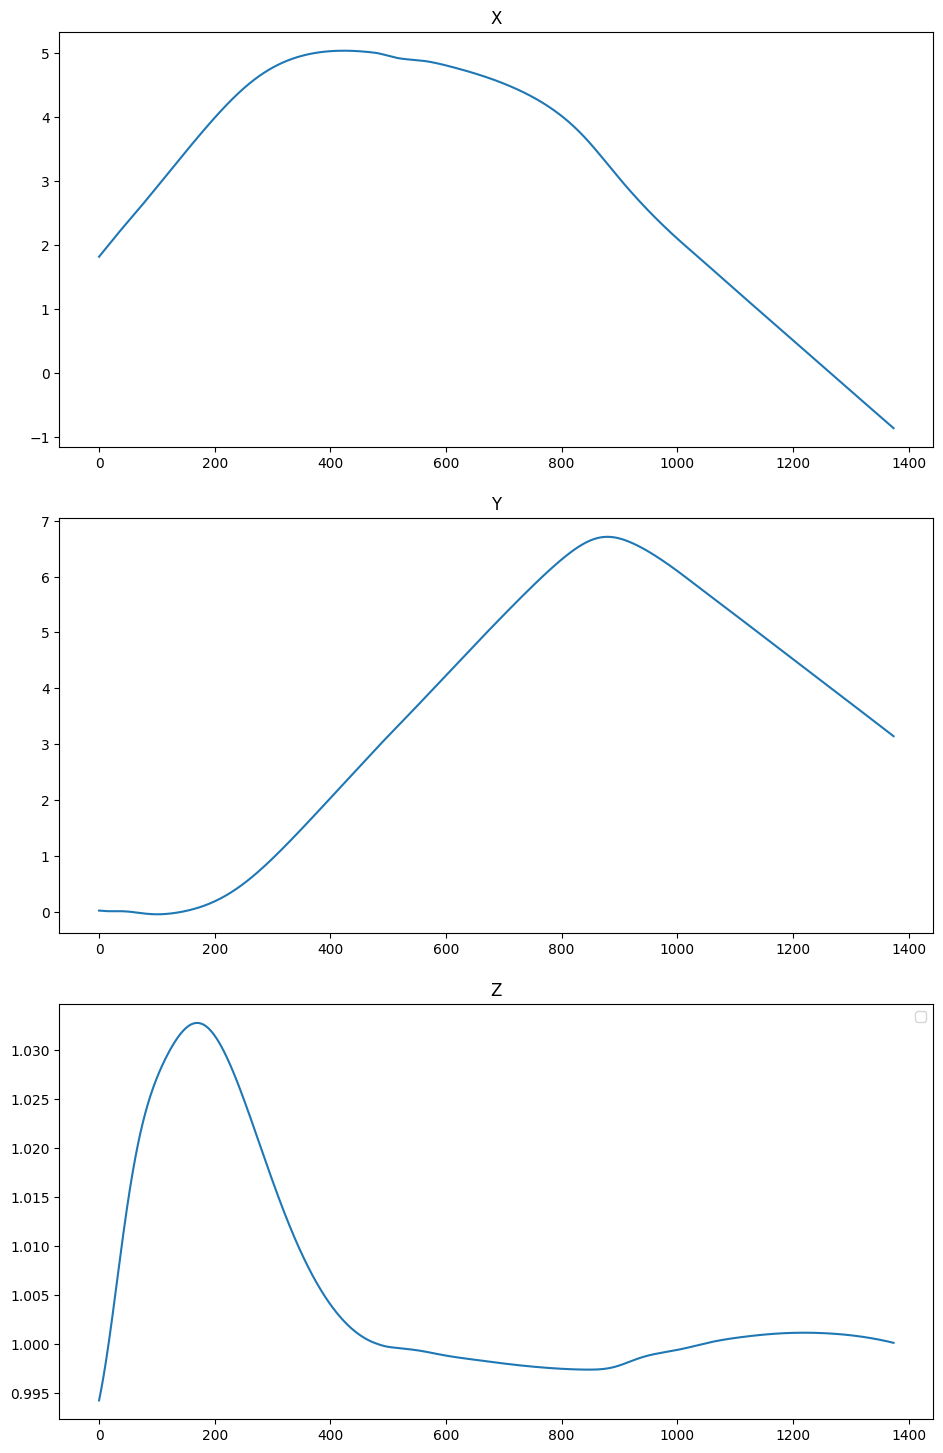

In [4]:
plt.rcParams['figure.figsize'] = 10,15
fig, axs = plt.subplots(3)
fig.tight_layout(pad=3.0)

axs[0].plot(df['x'])
# axs[0].plot(df['x_sp'])
axs[0].set_title("X")

axs[1].plot(df['y'])
# axs[1].plot(df['y_sp'])
axs[1].set_title("Y")

axs[2].plot(df['z'])
# axs[2].plot(df['z_sp'])
axs[2].set_title("Z")



plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


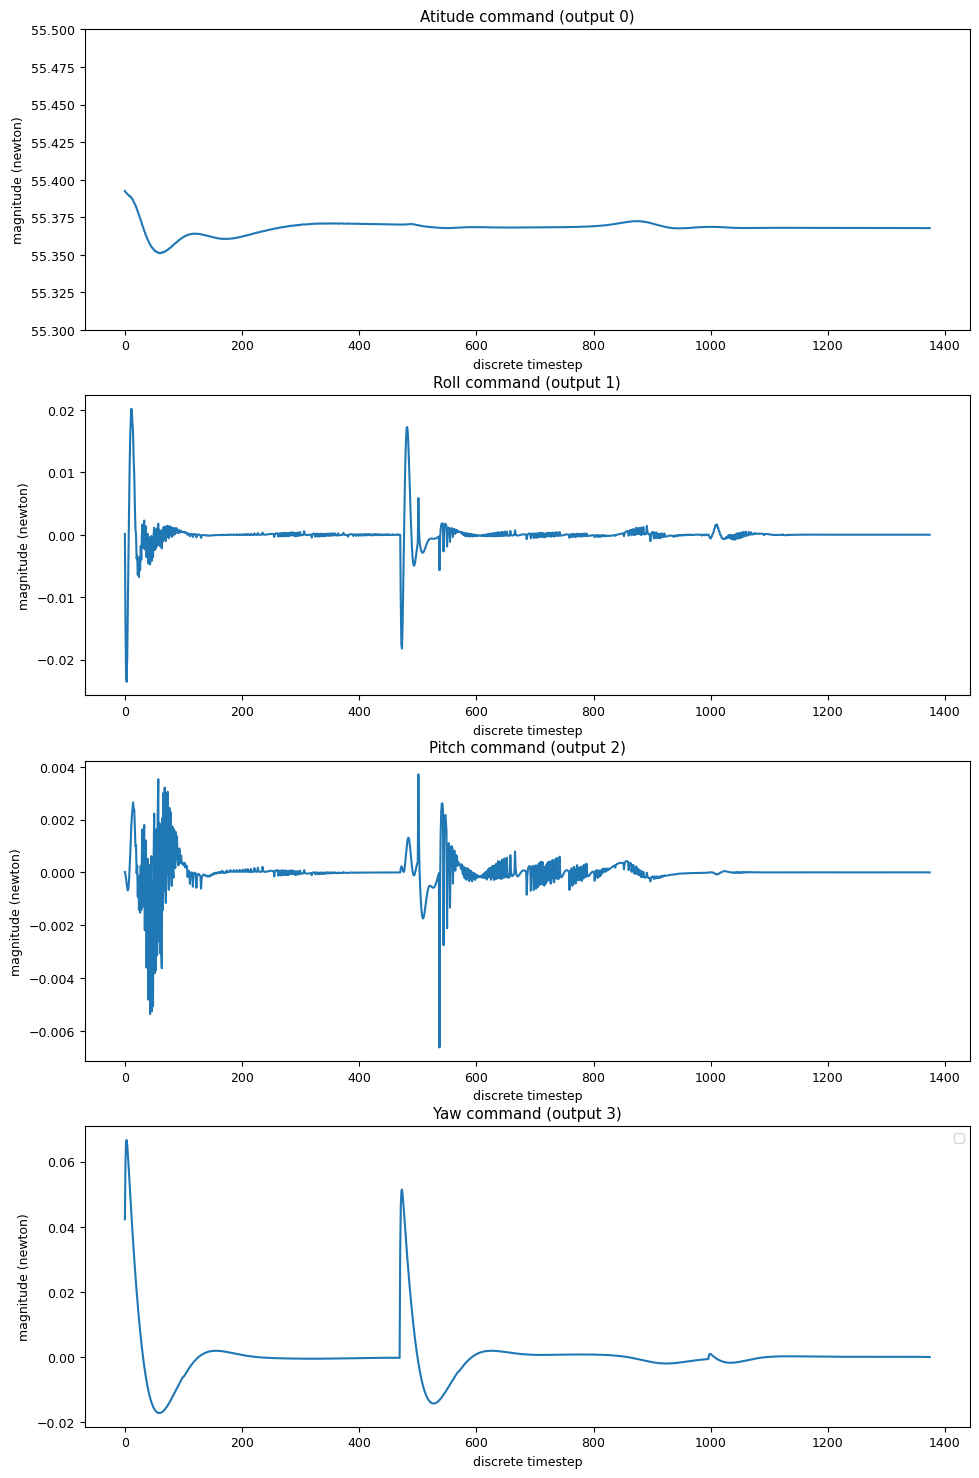

In [5]:
plt.rcParams['figure.figsize'] = 10,15
plt.rcParams['font.size'] = 9
fig, axs = plt.subplots(4)
fig.tight_layout(pad=3.0)
min_scope, max_scope = 0, 10000


axs[0].plot(df['alt_command'][min_scope:max_scope])
axs[0].set_title("Atitude command (output 0)")
axs[0].set_xlabel('discrete timestep')
axs[0].set_ylabel('magnitude (newton)')
axs[0].set_ylim(55.3,55.5)

axs[1].plot(df['roll_command'][min_scope:max_scope])
axs[1].set_title("Roll command (output 1)")
axs[1].set_xlabel('discrete timestep')
axs[1].set_ylabel('magnitude (newton)')

axs[2].plot(df['pitch_command'][min_scope:max_scope])
# axs[2].plot([x for x in df['pitch_command'][min_scope:max_scope].index ],[0 for x in df['pitch_command'][min_scope:max_scope]])
axs[2].set_title("Pitch command (output 2)")
axs[2].set_xlabel('discrete timestep')
axs[2].set_ylabel('magnitude (newton)')

axs[3].plot(df['yaw_command'][min_scope:max_scope])
axs[3].set_title("Yaw command (output 3)")
axs[3].set_xlabel('discrete timestep')
axs[3].set_ylabel('magnitude (newton)')

plt.legend()
plt.show()

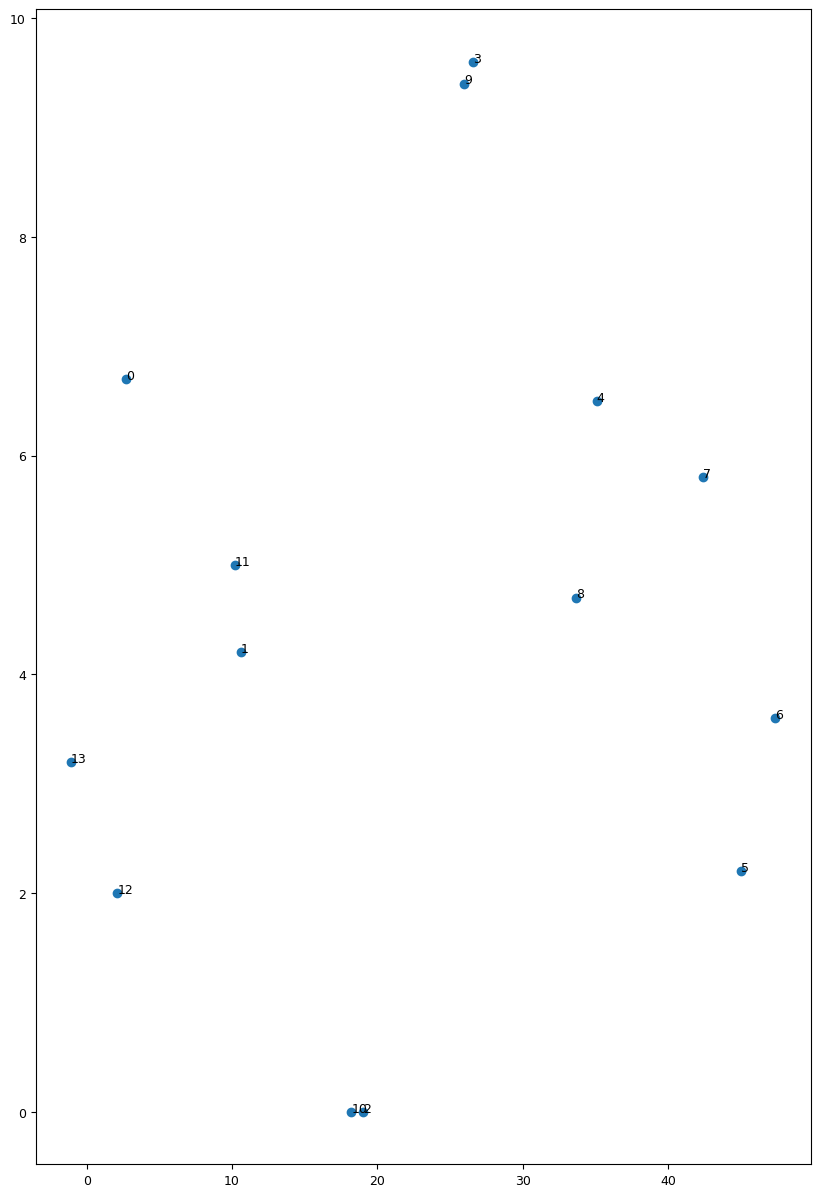

In [6]:
maps = np.array([[2.7, 6.7],
  [10.6, 4.2],
  [19.0,  0.0],
  [26.6,  9.6],
  [35.1,  6.5],
  [45.0,  2.2],
  [47.4,  3.6],
  [42.4, 5.8],
  [33.7, 4.7],
  [26.0, 9.4],
  [18.2,  0.0],
  [10.2,  5.0],
  [2.1,  2.0],
  [-1.1,  3.2]])
x,y = [x[0] for x in maps], [x[1] for x in maps]
plt.scatter(x,y)

for i in range(len(x)):
    plt.annotate(i, (x[i], y[i]))
